In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.rename(columns={'SepalLengthCm':'SL', 'SepalWidthCm':'SW', 'PetalLengthCm':'PL', 'PetalWidthCm':'PW'}, inplace=True)

In [6]:
data.head()

,Id,SL,SW,PL,PW,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
iris_setosa=data[data['Species']=='Iris-setosa']
iris_versicolor=data[data['Species']=='Iris-versicolor']
iris_virginica=data[data['Species']=='Iris-virginica']

## 1. Mean
In case of outliers we should not use mean it will skew mean towards one side, solution is median

In [14]:
print(np.mean(iris_setosa['SW']))
print(np.mean(iris_versicolor['SW']))
print(np.mean(iris_virginica['SW']))

3.4180000000000006
2.7700000000000005
2.9739999999999998


In [15]:
print(np.mean(iris_setosa['PL']))
print(np.mean(iris_versicolor['PL']))
print(np.mean(iris_virginica['PL']))

1.464
4.26
5.552


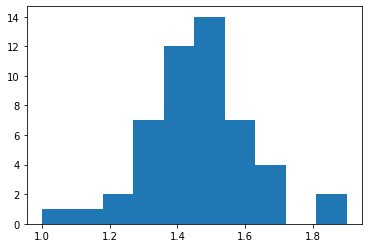

In [17]:
plt.hist(iris_setosa['PL']);

### Outliers skew mean towards one side
Shifted the mean greater than the max value.

In [20]:
np.mean(np.append(iris_setosa['PL'],50))

2.4156862745098038

## 2. Median
Median doesn't work on outliers

In [18]:
print(np.median(iris_setosa['PL']))
print(np.median(iris_versicolor['PL']))
print(np.median(iris_virginica['PL']))

1.5
4.35
5.55


### Outliers-not a problem

In [21]:
np.median(np.append(iris_setosa['PL'],50))

1.5

#### Unless there are more than half values are outliers, median is unaffected.

In [22]:
arr=np.array([1,4,5,8,12,600,700,800,10000])
np.median(arr)

12.0

## 3. Mode
Most frequent observation in sample.

In [23]:
from scipy import stats

print(stats.mode(iris_setosa['PL']))
print(stats.mode(iris_versicolor['PL']))
print(stats.mode(iris_virginica['PL']))

ModeResult(mode=array([1.5]), count=array([14]))
ModeResult(mode=array([4.5]), count=array([7]))
ModeResult(mode=array([5.1]), count=array([7]))


# Which one should we use?

We should try to use all three to have the fair idea about centraility of data.

# Measurement of Spread
### Spread or variation of data
## 1. Range
Difference b/w max and mi value of data

In [26]:
r=np.max(iris_setosa['PL'])-np.min(iris_setosa['PL'])
print("The range is",r)

The range is 0.8999999999999999


## 2. Percentile
Indicates a value below which a given percentage of observaions fall.

In [28]:
mylist=[1,2,3,4,5,6,7,8,9]

print(np.percentile(mylist,25))
print(np.percentile(mylist,90))

3.0
8.2


In [30]:
np.percentile(iris_setosa['PL'],95)

1.7

## 3. Quartiles
Divides list of observation into quarters

In [31]:
print(np.percentile(iris_setosa['PL'],25))
print(np.percentile(iris_setosa['PL'],50))
print(np.percentile(iris_setosa['PL'],75))
print(np.percentile(iris_setosa['PL'],100))

1.4
1.5
1.5750000000000002
1.9


## 4. Interquartile range
Measure of statistical dispersion b/w upper 75th and lower 25th quartiles

In [34]:
iqr=np.percentile(iris_setosa['PL'],75)-np.percentile(iris_setosa['PL'],25)
iqr

0.17500000000000027

## 5. Mean absolute deviation

## 6. Variance

In [35]:
np.var(iris_setosa['PL'])

0.02950400000000001

## 7. Standard devition
sqrt(variance)

In [36]:
np.std(iris_setosa['PL'])

0.17176728442867115

## 8. Median Absolute deviation

In [37]:
from statsmodels import robust
robust.mad(np.array([1,3,5,6,7,8,9]))

2.965204437011204

## SD vs Median AD
If outliers are there the go with MAD, if no outliers then SD.
## Probability Density fn

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


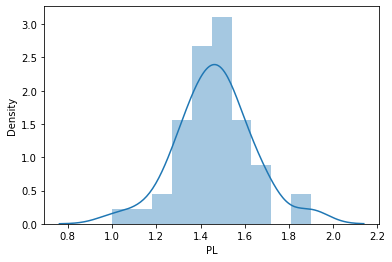

In [39]:
#distplot
sns.distplot(iris_setosa['PL']);

The curve is probability density function(PDF) calculted using Kernal Density estimation. Tells the density of points in that particular range.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

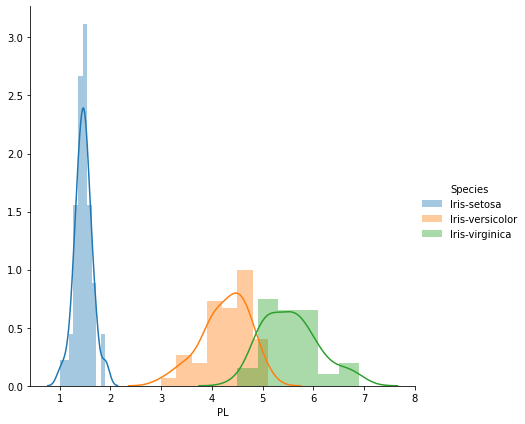

In [41]:
sns.FacetGrid(data, hue='Species', height=6).map(sns.distplot,'PL').add_legend()

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


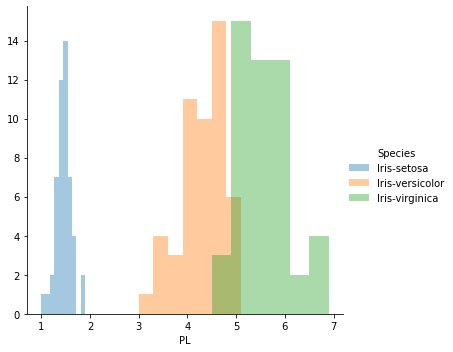

In [46]:
sns.FacetGrid(data, hue='Species', height=5).map(sns.distplot,'PL', kde=False).add_legend()

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

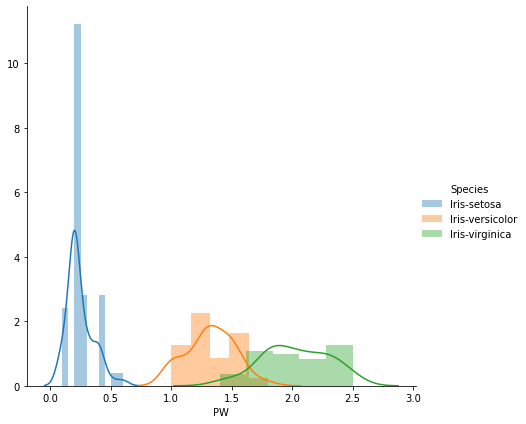

In [43]:
sns.FacetGrid(data, hue='Species', height=6).map(sns.distplot,'PW').add_legend()

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

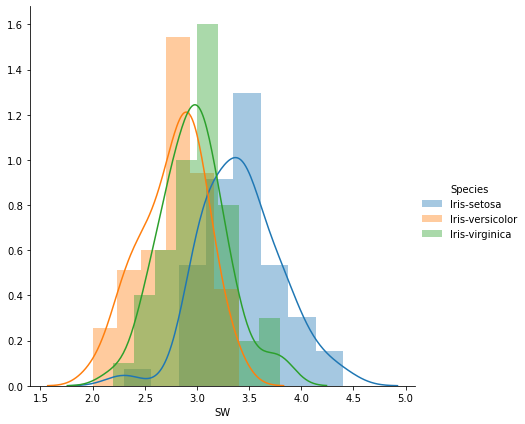

In [44]:
sns.FacetGrid(data, hue='Species', height=6).map(sns.distplot,'SW').add_legend()

We can use PL to distinguish b/w the species.

## Cummulative distribution function

To find PDF, just calculate the probablity of the data points.

Total obs=50

freq of 1.5=7

prob=7/50

To calculate CDF:

e.g. value of cdf at 1.6==>no. of points <1.6=41
41/50

Area under the pdf cuve is till that point is the cdf at that point.

pdf->integrate->cdf


cdf->diff-> pdf

In [49]:
np.histogram(iris_setosa['PL'],bins=10) #provides data and bins edeges

(array([ 1,  1,  2,  7, 12, 14,  7,  4,  0,  2], dtype=int64),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]))

In [50]:
counts, bin_edge=np.histogram(iris_setosa['PL'],bins=10)

In [51]:
pdf=counts/sum(counts)

cdf=np.cumsum(pdf)

In [52]:
pdf

array([0.02, 0.02, 0.04, 0.14, 0.24, 0.28, 0.14, 0.08, 0.  , 0.04])

In [53]:
cdf

array([0.02, 0.04, 0.08, 0.22, 0.46, 0.74, 0.88, 0.96, 0.96, 1.  ])

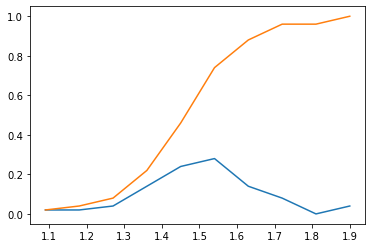

In [54]:
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)

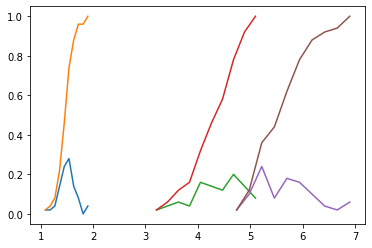

In [56]:
counts, bin_edge=np.histogram(iris_setosa['PL'],bins=10)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)

counts, bin_edge=np.histogram(iris_versicolor['PL'],bins=10)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)

counts, bin_edge=np.histogram(iris_virginica['PL'],bins=10)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf);